# Initial Setup

In [57]:
 # Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import the time series data: Air line passenger traffic data

In [58]:
data = pd.read_csv("airline-passenger-traffic.csv", header = None)

In [59]:
data.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [60]:
data.columns = ['Month', 'Passengers']

In [61]:
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")

In [62]:
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


## Time series Analysis

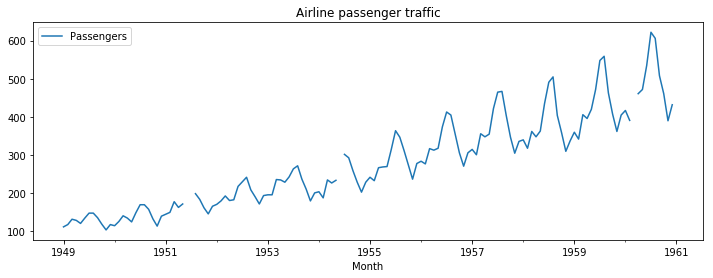

In [63]:
#Plot time series data:
data.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Airline passenger traffic')
plt.show(block=False)

We can see that there are some missing values in the data.
we need to replace the missing data, using some imputation techinues like meadian or mean(doesnt consider temporal value)
1. Some other techniques are : Last observation carry forward (Naive, but captures the trend atleast)
2. Linear interpolation: Everytime we have missing value, Draw a straight line between the missing left and right points( trend gets captured,but seasonality might not)
3. Seasonality linear interpolation: 1956 March can be average of 1954 March and 1957 March. This can be used as imputation which takes care of trend and Seasonality into consideration.


## Missing value treatement

In [64]:
#Mean Imputation
data  = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))

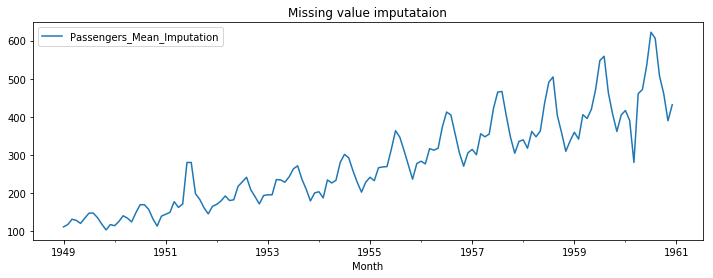

In [65]:
#Plot time series data for the mean imputation:
data[['Passengers_Mean_Imputation']].plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Missing value imputataion')
plt.show(block=False)

Observation: 
1. If we see in the year of 1952, the imputation is with mean and way above the values of passengers present at that point of time (over estimation).
2. In the year of 1960's we can see the imputaion of mean caused severe under estimation of the passengers


## Linear Interpolation

In [66]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method ='linear'))

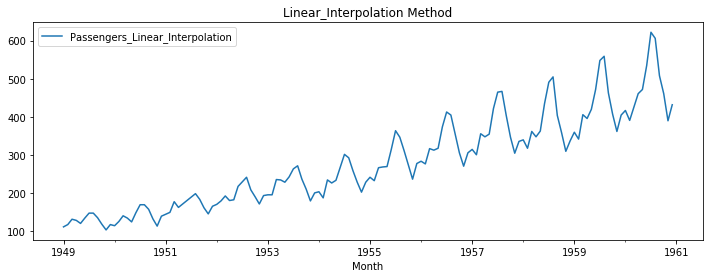

In [67]:
#Plot time series data for linear interpolation:
data[['Passengers_Linear_Interpolation']].plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Linear_Interpolation Method')
plt.show(block=False)

Observations:
1. As this technique takes the avg of left and right of the missing obs, and we can see that the trend gettting captured
2. So we can use the linear interpolation technique to replace the missing values

In [68]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

## Outlier Detection

### Box plot and inter quartile range

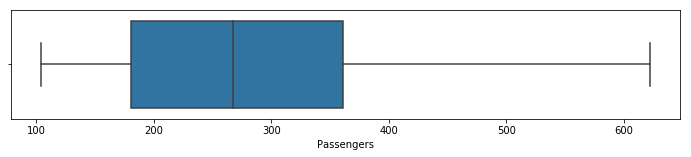

In [69]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1.5)

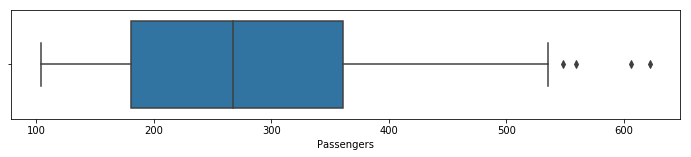

In [70]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1)

As we can see that thesdata points which were identified as outliers in the whis  = 1 scenario are not outlier but the healthy seasonality indexed points as per the time series plot of the data.
    So we can say that there are no outliers as per this boz plot methods

### Histogram plot

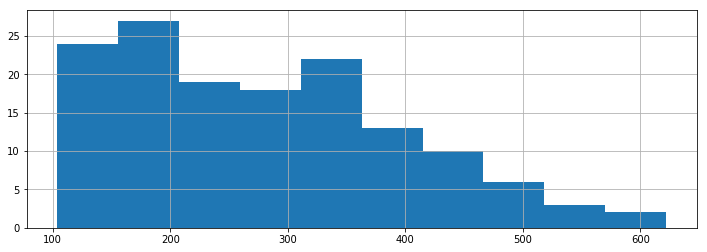

In [71]:
fig = data.Passengers.hist(figsize = (12,4))

Here also we can see that there is no break in the distribution of the data , so as per this method also we can conclude that there are no outliers in this column

## Time series decomposition

#### Additive seasonal decompostion

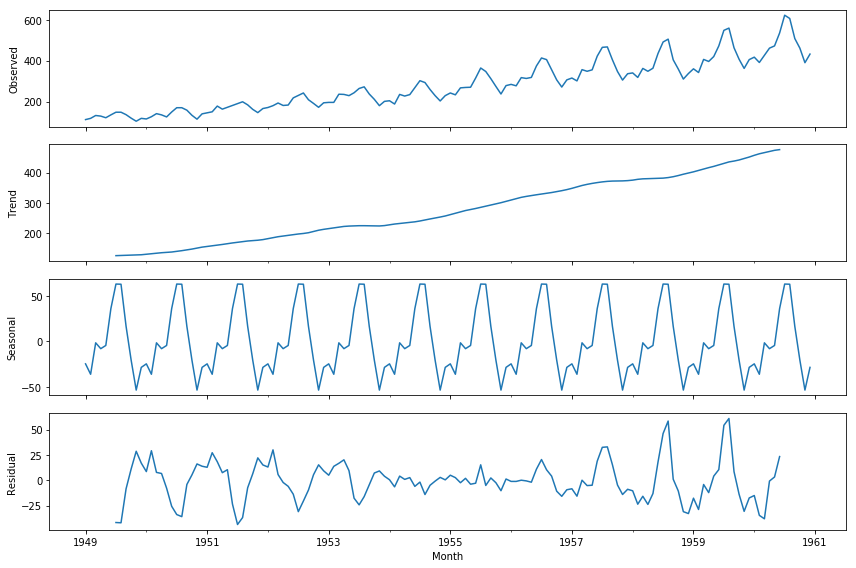

In [72]:
from pylab import rcParams
# will suse extensively 
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
#tsa means timeseriesanalysis
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'additive')
fig = decompostion.plot()
plt.show()

Observations:
As we can see when we decomposed the timeseries data into trend, seasonality and residual.
1. Trend: Is it increasing or decreasing?
2. Seasional: We can see if the data is having any seasonal effects of repeting the data pattern
3. Residual: After removing the trend and seasonality we are left with this, even then we can see that there is some sort of seasonlity being observed in the residual.

### Multiplicative Seasional Decomposition

In [73]:
decomposition2 = sm.tsa.seasonal_decompose(data.Passengers, model ='multiplicative')

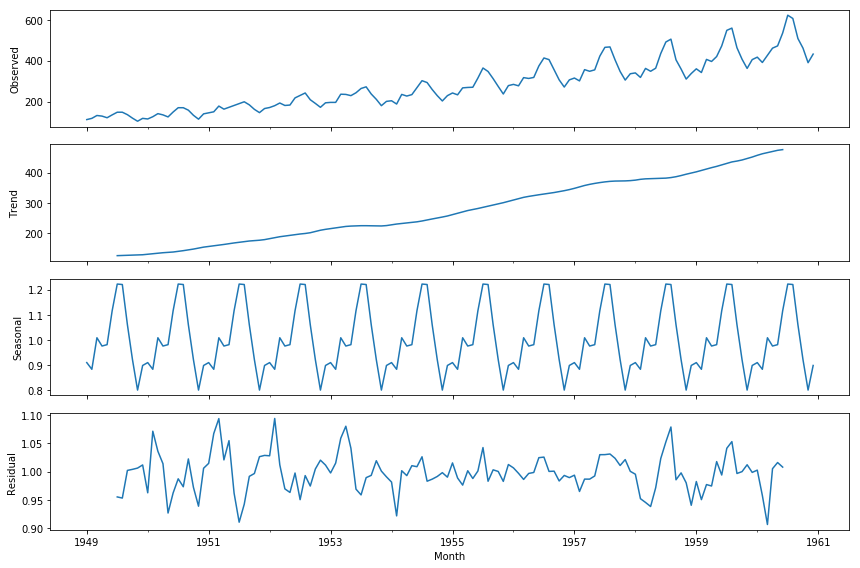

In [74]:
fig = decomposition2.plot()
plt.show()

### Build and evaluate Time Series Forecast

In [75]:
# Splitting the dataset into train and test datasets

In [76]:
# first 120 rows
train_len = 120
train = data[0:train_len]
test = data[train_len:]

### Naive Method

In [77]:
y_hat_naive = test.copy()

In [78]:
#Taking the last observation of the train dataset and getting it as the forecast for the rest of the test dataset
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [79]:
y_hat_naive['naive_forecast']

Month
1959-01-01    337.0
1959-02-01    337.0
1959-03-01    337.0
1959-04-01    337.0
1959-05-01    337.0
1959-06-01    337.0
1959-07-01    337.0
1959-08-01    337.0
1959-09-01    337.0
1959-10-01    337.0
1959-11-01    337.0
1959-12-01    337.0
1960-01-01    337.0
1960-02-01    337.0
1960-03-01    337.0
1960-04-01    337.0
1960-05-01    337.0
1960-06-01    337.0
1960-07-01    337.0
1960-08-01    337.0
1960-09-01    337.0
1960-10-01    337.0
1960-11-01    337.0
1960-12-01    337.0
Name: naive_forecast, dtype: float64

### Plot train,test and forecast

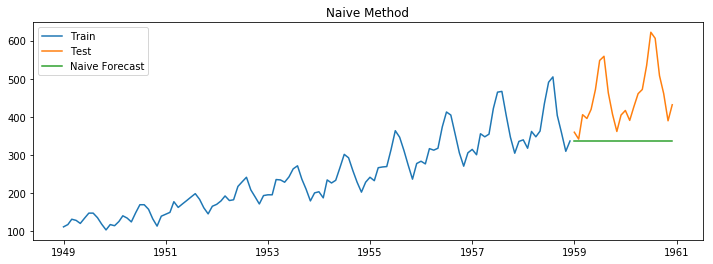

In [80]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label ='Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Method')
plt.show()

### Caluculating the RMSE and MAPE to evaluate Forecast

In [81]:
# to caluculate RMSE: Root Mean Square Error:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)
results = pd.DataFrame({'Method':['Naive Method'],'MAPE': [mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


## Simple average method

In [82]:
y_hat_avg = test.copy()

In [83]:
#Caluculating the average of the no of passengers in the last 10 years of the train dataset and using it to forecast it for future 2 years
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

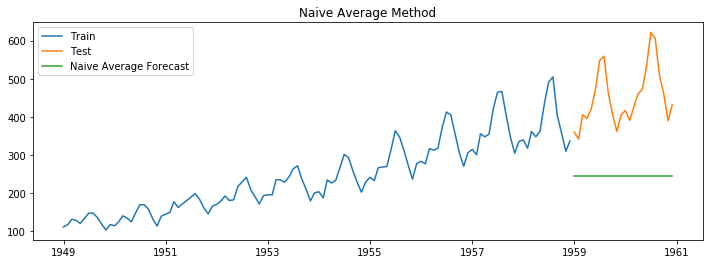

In [84]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label ='Naive Average Forecast')
plt.legend(loc = 'best')
plt.title('Naive Average Method')
plt.show()

### Caluculating the RMSE and MAPE to evaluate Forecast

In [85]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Averge Method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28


## Simple Moving Average method

In [86]:
y_hat_sma = data.copy()

In [87]:
#moving average window
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

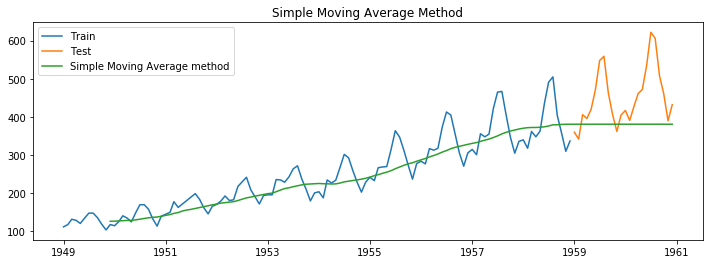

In [88]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

Observations:
1. We can see that the somewhat recent trend is getting inherently getting captured.
2. It is better than the simple average method


In [89]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Averge Method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54


Reducing the moving average window:

In [90]:
#moving average window
ma_window = 6
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

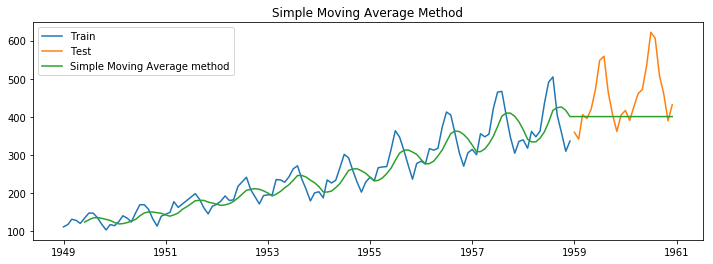

In [91]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

Obs: We can see that the seasonality is getting captured but with a lag of some 4-5 months.
- Lets see what would happen if we reduce the moving average window to 3 months

In [92]:
#moving average window
ma_window = 3
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

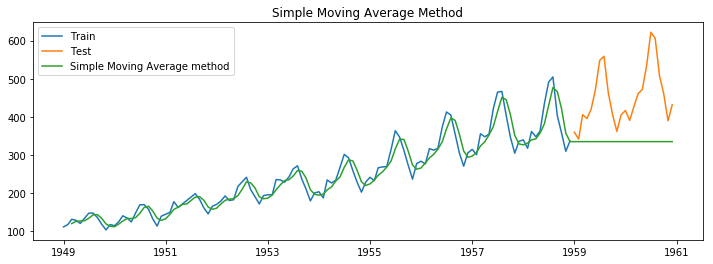

In [93]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

This is not good absolutely because we are failing to predict seasnality as the window got smaller, look at 1960 jan value

## Simple Exponential Smooting

In [94]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#Creating a model object for simple exp smoothing
model = SimpleExpSmoothing(train['Passengers'])
#Smoothing level is the alpha parmeter, i.e the weight assigned to the latest data point
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


### Plotting train, test, forecast

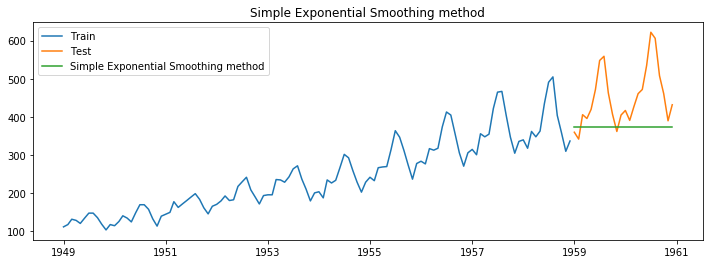

In [95]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label ='Simple Exponential Smoothing method')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing method')
plt.show()

In [96]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Exponential Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49


## Holts Exponential Smoothingm with Trend

In [97]:
#this method helps capturing trend also in addition to the level
#level parameter is aplpha and trend parameter : beta

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Creating a model object for exp smoothing
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods = 12, trend ='additive', seasonal = None )
#Smoothing level is the alpha parmeter, i.e the weight assigned to the latest data point
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized = False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


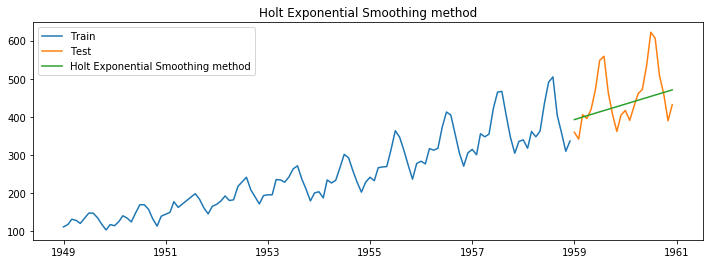

In [99]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_holt['holt_forecast'], label ='Holt Exponential Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Exponential Smoothing method')
plt.show()

Obs:
1. We got a level as well as trend being seen in the prediction

### Caluculating the RMSE and MAPE

In [100]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_holt['holt_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holts Exponential Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11


## Holt winters' Addtivie Smoothing

In [101]:
y_hat_hwa = test.copy()

In [102]:
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal= 'add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2631578931410155, 'smoothing_slope': 0.05162963437848354, 'smoothing_seasonal': 0.7368421036673313, 'damping_slope': nan, 'initial_level': 211.55097673395076, 'initial_slope': 1.739194664563169, 'initial_seasons': array([-100.18118564,  -94.20464265,  -80.29175978,  -83.41759103,
        -91.45908923,  -77.45095857,  -64.48325265,  -64.5734032 ,
        -76.66645557,  -93.73585702, -108.67612371,  -94.50949375]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test, forecast

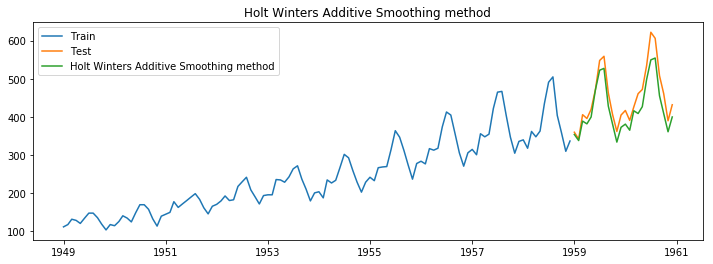

In [103]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_hwa['hwa_forecast'], label ='Holt Winters Additive Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Winters Additive Smoothing method')
plt.show()

### Caluculating the RMSE and MAPE

In [104]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holts Winters Additive Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53


## Holt winters' Multiplicative Smoothing

In [105]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal= 'mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.38562417707363594, 'smoothing_slope': 0.035296547303939975, 'smoothing_seasonal': 0.6143757883755401, 'damping_slope': nan, 'initial_level': 212.39836999762034, 'initial_slope': 1.11064391632251, 'initial_seasons': array([0.5184742 , 0.54680406, 0.60373277, 0.57048068, 0.52106405,
       0.5732235 , 0.62846481, 0.62610082, 0.57036018, 0.4951661 ,
       0.43972748, 0.51400311]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test, forecast

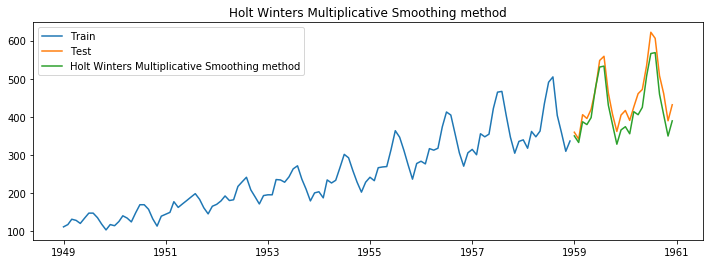

In [106]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_hwm['hwm_forecast'], label ='Holt Winters Multiplicative Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Winters Multiplicative Smoothing method')
plt.show()

### Caluculating the RMSE and MAPE

In [107]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwm['hwm_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holts Winters Multiplicative Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
